# Proyección en los $n$ componentes principales

## 0. Imports & cargado de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "../datasets/"
file_name = "setX_wdbc.csv"
X_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
file_name = "setY_wdbc.csv"
Y_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
Y_color = Y_init.replace(['M','B'],['r','b']).values.ravel() #<- this is for plotting
#------------------------------------
X_init.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dim1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dim3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. PCA con $D=2~$ y $~d=\{1,2\}$

### 1.1. Preselección de características

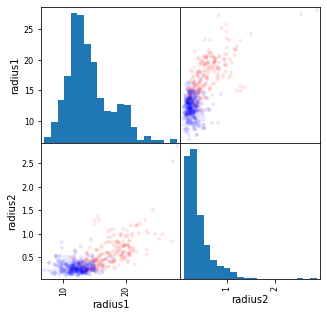

In [19]:
cols_idx = [0,10] #<-- select two columns (or just put the names in 'cols' and comment this line)
cols  = X_init.columns[cols_idx] 
X_sel = X_init[cols] 

spm = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

### 1.2. Estandarización de los datos

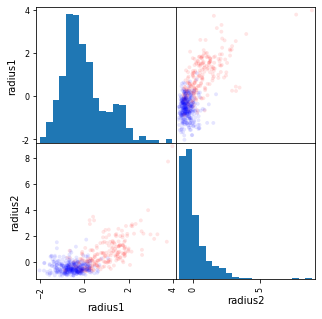

In [20]:
flag_scale = 'standard' # 'standard', 'noMean', 'unit' , otherwise is 'none'='init'

if flag_scale == 'standard' :
    std_scaler  = StandardScaler().set_output(transform="pandas")    
    std_scaler.fit(X_sel)
    X_scl = std_scaler.transform(X_sel)
elif flag_scale == 'noMean':
    X_scl =(X_sel - X_sel.mean())
elif flag_scale == 'unit':
    unit_scaler = MinMaxScaler().set_output(transform="pandas")
    unit_scaler.fit(X_sel)
    X_scl = unit_scaler.transform(X_sel)
else:
    X_scl = X_sel
    
spm = pd.plotting.scatter_matrix(X_scl, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

### 1.3. Análisis de componentes principales

In [1]:
d = 2  #  1  ,  2

col_names = ['pc%d'%(col+1) for col in range(d)]
print(col_names)

pca = PCA(n_components=d)
pca.fit(X_scl)
X_pca = pd.DataFrame(pca.transform(X_scl), columns=col_names)

spm = pd.plotting.scatter_matrix(X_pca, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']


NameError: name 'PCA' is not defined

In [24]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['radius1', 'radius2'], dtype=object),
 'n_features_in_': 2,
 '_fit_svd_solver': 'full',
 'mean_': array([-1.37363271e-16,  2.37263831e-16]),
 'noise_variance_': 0.0,
 'n_samples_': 569,
 'components_': array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]),
 'n_components_': 2,
 'explained_variance_': array([1.68204653, 0.32147459]),
 'explained_variance_ratio_': array([0.83954519, 0.16045481]),
 'singular_values_': array([30.90958477, 13.5128668 ])}

## 2. PCA con $D \gg 2~$ y $~d<D$

In [25]:
n_components = 0.9

cols_idx = range(0,30) #<-- select two columns (or just put the names in 'cols' and comment this line)
cols  = X_init.columns[cols_idx] 
X_sel = X_init[cols] 

std_scaler  = StandardScaler().set_output(transform="pandas")    
std_scaler.fit(X_sel)
X_scl = std_scaler.transform(X_sel)

pca = PCA(n_components = n_components)
pca.fit(X_scl)

X_pca = pd.DataFrame(pca.transform(X_scl))
col_names = ['pc%s'%col for col in X_pca.columns]
X_pca.columns=col_names
X_pca

,pc0,pc1,pc2,pc3,pc4,pc5,pc6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082


In [27]:
pca.__dict__

{'n_components': 0.9,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
        'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
        'fractal_dim1', 'radius2', 'texture2', 'perimeter2', 'area2',
        'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
        'symmetry2', 'fractal_dim2', 'radius3', 'texture3', 'perimeter3',
        'area3', 'smoothness3', 'compactness3', 'concavity3',
        'concave_points3', 'symmetry3', 'fractal_dim3'], dtype=object),
 'n_features_in_': 30,
 '_fit_svd_solver': 'full',
 'mean_': array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
        -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
         1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
